## Carregando o dataset

In [0]:
import pandas as pd

df = pd.read_csv(
    "https://s3.amazonaws.com/automl-example/produtos.csv",
    delimiter=";",
    encoding='utf-8'
)

df.describe()

,nome,descricao,categoria
count,4080,2916,4080
unique,3696,2460,4
top,Mais Escuro - Cinquenta Tons Mais Escuros Pel...,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,brinquedo
freq,20,39,1020


In [0]:
df.head()

,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


## Quais valores são nulos e qual a porcentagem

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 3 columns):
nome         4080 non-null object
descricao    2916 non-null object
categoria    4080 non-null object
dtypes: object(3)
memory usage: 95.7+ KB


In [0]:
df.shape

(4080, 3)

In [0]:
df.isnull().sum()

nome            0
descricao    1164
categoria       0
dtype: int64

In [0]:
df.isnull().sum()/df.shape[0]

nome         0.000000
descricao    0.285294
categoria    0.000000
dtype: float64

## Remover as linhas com valores nulos

In [0]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 4079
Data columns (total 3 columns):
nome         2916 non-null object
descricao    2916 non-null object
categoria    2916 non-null object
dtypes: object(3)
memory usage: 91.1+ KB


## Distribuição das categorias

In [0]:
df.categoria.value_counts()

livro        838
maquiagem    788
brinquedo    668
game         622
Name: categoria, dtype: int64

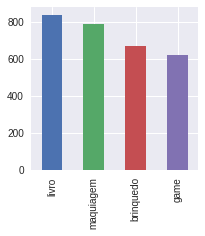

In [0]:
df.categoria.value_counts().plot(kind='bar', figsize=(3,3))

## Mostrar as 10 palavras que mais ocorrem

In [0]:
from collections import Counter

c = Counter()


In [0]:
df.descricao.str.lower().str.split(" ").apply(c.update)
c.most_common(10)

[('de', 23835),
 ('e', 15774),
 ('o', 12238),
 ('a', 11905),
 ('do', 8657),
 ('para', 7913),
 ('em', 6798),
 ('que', 6770),
 ('-', 6220),
 ('com', 6099)]

In [0]:
print('Livro: ', c.get('livro'))
print('Game: ', c.get('game'))
print('Brinquedo: ', c.get('brinquedo'))
print('Maquiagem: ', c.get('maquiagem'))

Livro:  545
Game:  138
Brinquedo:  50
Maquiagem:  493


In [0]:
c.get('batom')

202

## Nuvem de palavras

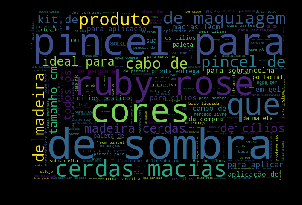

In [0]:
import nltk
import matplotlib.pyplot as plt

try:
  from wordcloud import WordCloud
except:
  !pip install wordcloud
  

livro_words = ''

livro = df[df.categoria == 'maquiagem']


for val in livro.descricao:
    text = val.lower()
    for words in text:
        livro_words = livro_words + words

# Generate a word cloud image
livro_wordcloud = WordCloud(width=600, height=400).generate(livro_words)


#Livro Word cloud
plt.figure( figsize=(4,4), facecolor='k')
plt.imshow(livro_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [0]:
livro_words

'produto novobilbo bolseiro é um hobbit que leva uma vida confortável e sem ambições. mas seu contentamento é perturbado quando gandalf, o mago, e uma companhia de anões batem à sua porta e levam-no para uma expedição. eles têm um plano para roubar o tesouro guardado por smaug, o magnífico, um grande e perigoso dragão. bilbo reluta muito em participar da aventura, mas acaba surpreendendo até a si mesmo com sua esperteza e sua habilidade como ladrão!característicasautor: tolkien, j. r. r.peso: 0.44i.s.b.n.: 9788578277109altura: 20.000000largura: 13.000000profundidade: 1.000000número de páginas: 328idioma: portuguêsacabamento: brochuranúmero da edição: 7ano da edição: 2013produto novodurante as férias escolares de 1958, em derry, pacata cidadezinha do maine, bill, richie, stan, mike, eddie, ben e beverly aprenderam o real sentido da amizade, do amor, da confiança e... do medo. o mais profundo e tenebroso medo. naquele verão, eles enfrentaram pela primeira vez a coisa, um ser sobrenatural

In [0]:
c.get('sombra')

384